In [1]:
#########################################################
#                    PROCEDIMIENTO                      #              
#########################################################
#   1. Separar el Dataset entre entrenamiento y test    #
#   2. Separar el Conjunto de entramiento en baseData   #
#      y poolData (Basedata puede ser 50,100...)        #
#   3. Calcular la distance entre las clases del        #
#      baseData con la muestra que vamos añadiendo      #
#   4. Calcular la distribución Softmax y la Entropía   #
#   5. Añadir el ejemplo si es de buena calidad,        #
#      podemos incluir el num de ejemplos que queramos  #
#      por ejemplo añadir solo 10                       #
#########################################################

In [12]:
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib as plt
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
import seaborn as sns
import plotly.graph_objects as go

In [16]:
X,y = datasets.make_classification(n_samples=4000, n_features=8, n_informative=4, n_redundant=3, n_repeated=0, n_classes=4, n_clusters_per_class=1)

In [719]:
X, y = datasets.make_blobs(n_samples=5000, centers=5, n_features=8)

In [720]:
#####################
#        1          #
#####################

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X1,X_test,y1,y_test=train_test_split(X, y,stratify=y,test_size=0.2,random_state=42,shuffle=True)

In [6]:
#####################
#        2          #
#####################

In [7]:
# Para calcular el porcentaje
numClass= len(np.unique(y1)) #saber cuantas clases diferentes hay
numPerClass = 50
numTotal = X1.shape[0]
porc = ((numClass*numPerClass*100)/numTotal)/100

In [838]:
porc

0.0625

In [8]:
X_Pool,X_Base,y_Pool,y_Base= train_test_split(X1, y1,stratify=y1,test_size=porc,random_state=42,shuffle=True)

In [4]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

In [805]:
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result.shape

(4000, 2)

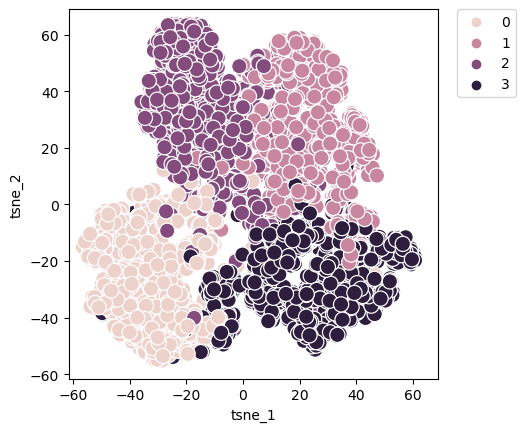

In [806]:
 # Plot the result of our TSNE with the label color coded
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [807]:
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X_Base)
tsne_result.shape

(200, 2)

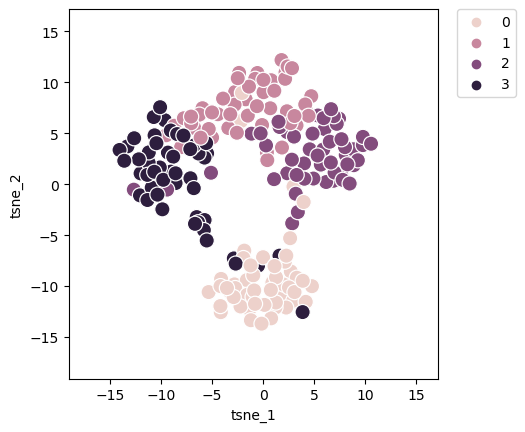

In [808]:
 # Plot the result of our TSNE with the label color coded
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y_Base})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [809]:
############
#     3    # 
############

In [11]:
val, cont = np.unique(y_Base,return_counts=True)

In [13]:
cont

array([50, 50, 50, 50], dtype=int64)

In [10]:
centros=[]
val, cont = np.unique(y_Base,return_counts=True)
for i in val:
    ind_i=np.where(y_Base==i)
    suma = sum(X_Base[ind_i])
    centro=suma/cont[i]
    centros.append(centro)

In [5]:
def listEuclidean (p1,cen):
    return [euclidean(p1,c) for c in cen]

In [6]:
def euclidean (p1,p2):
    res_e = (p2-p1)**2
    suma = sum(res_e)
    return math.sqrt(suma)

In [7]:
############
#     4    # 
############

In [8]:
def softmax(distances):
    expon = np.exp(distances)
    suma = np.sum(expon)
    return expon/suma
    

In [9]:
def entropy(softProb):
    op = softProb*(np.log2(softProb))
    return -1*(np.sum(op))

In [816]:
#############################
#        PRUEBAS            #
#############################

In [817]:
centros

[array([ 0.93819196,  1.06565364,  0.05413533,  0.77067446,  0.97494947,
         1.55201371, -1.0971087 , -0.0795311 ]),
 array([-0.94998745, -0.97083062, -0.12648367, -0.89280995, -1.05925121,
        -1.48882655,  1.07012005,  0.02078755]),
 array([ 1.00573352, -0.89172871, -0.76909227,  1.0572065 , -0.96175068,
        -1.4293755 , -0.47655231, -0.03992641]),
 array([-0.654242  , -1.02454037,  0.57786791, -1.09546554,  0.90780386,
         0.66082746,  2.34348236,  0.17726448])]

In [818]:
entropies = [entropy(softmax(listEuclidean(x,cen))) for x in X_Pool]

In [819]:
adi = 20
entroMaxs = sorted(entropies,reverse=True)[:adi]

In [820]:
in_add=[]
for en in entroMaxs:
    in_add.append(np.where(np.array(entropies) == en)[0][0])

In [821]:
X_adicionantes=X_Pool[in_add]
y_adicionantes=y_Pool[in_add]

In [822]:
y_adicionantes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
def medidorDistEntr(X,y,adi,n_base):
    #---------1-----------#
    X1,X_test,y1,y_test = train_test_split(X, y,stratify=y,test_size=0.2,random_state=42,shuffle=True)
    #--------2------------#
    # Para calcular el porcentaje de samples en la base (se calcula numero*numClases)
    numClass= len(np.unique(y1)) #saber cuantas clases diferentes hay
    numTotal = X1.shape[0]
    porc = ((n_base*numClass*100)/numTotal)/100
    X_Pool,X_Base,y_Pool,y_Base = train_test_split(X1, y1,stratify=y1,test_size=porc,random_state=42,shuffle=True)
    #-------3------------#
    centros=[] #Calcular los centros 
    val, cont = np.unique(y_Base,return_counts=True) #val -> Clases y cont -> num de samples por clase
    for i in val:
        ind_i=np.where(y_Base==i)
        suma = sum(X_Base[ind_i])
        centro=suma/cont[i]
        centros.append(centro)
    #-------4-------------#
    entropies = [entropy(softmax(listEuclidean(x,centros))) for x in X_Pool]
    #listEuclidean devuelve una lista con la disctancia de un ejemplo con las clases del conjunto base
    #-------5------------#
    #Primero ordeno las entropias de mayor a menos
    entroMaxs = sorted(entropies,reverse=True)[:adi] #adi se refiere al número de muestras que queremos añadir
    in_add=[]
    #Aquí busco que índices en el conjunto de datos son los que tienen la entropía mayor
    for en in entroMaxs:
        in_add.append(np.where(np.array(entropies) == en)[0][0]) #Para calcular los índices con mayor entropía
        
    X_adicionantes=X_Pool[in_add]
    y_adicionantes=y_Pool[in_add]
    #-----Finalmente añadimos al subconjunto base-----#
    X_res = np.append(X_Base,X_adicionantes,axis=0)
    y_res = np.append(y_Base,y_adicionantes)
    
    return X_res, y_res
    

In [859]:
X_res,y_res = medidorDistEntr(X,y,20,100)

(6000, 100)

In [11]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [861]:
model = SVC(kernel="rbf")
inicio = time.time()
model.fit(X_res, y_res)
fin = time.time()
pred = model.predict(X_test)
print("Accuracy usando {}:".format("rbf"), accuracy_score(pred, y_test))
print("El tiempo de entrenamiento ha sido: ",fin-inicio)
print("")

Accuracy usando rbf: 0.89375
El tiempo de entrenamiento ha sido:  0.006971597671508789



In [862]:
model = SVC(kernel="rbf")
inicio = time.time()
model.fit(X_Base, y_Base)
fin = time.time()
pred = model.predict(X_test)
print("Accuracy usando {}:".format("rbf"), accuracy_score(pred, y_test))
print("El tiempo de entrenamiento ha sido: ",fin-inicio)
print("")

Accuracy usando rbf: 0.8725
El tiempo de entrenamiento ha sido:  0.0039882659912109375



In [974]:
###################################
#        Fashion Mnist            #
###################################

In [975]:
import os
for dirname, _, filenames in os.walk('fashion-mnist'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

fashion-mnist\fashion-mnist_test.csv
fashion-mnist\fashion-mnist_train.csv
fashion-mnist\t10k-images-idx3-ubyte
fashion-mnist\t10k-labels-idx1-ubyte
fashion-mnist\train-images-idx3-ubyte
fashion-mnist\train-labels-idx1-ubyte


In [976]:
train = pd.read_csv('fashion-mnist/fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist/fashion-mnist_test.csv')

In [977]:
df_train = train.copy()
df_test = test.copy()

In [978]:
X_train= df_train.drop(['label'],axis = 1)
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [979]:
X_test = df_train['label']
X_test

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [980]:
X_train.shape

(60000, 784)

In [981]:
X_test.shape

(60000,)

In [982]:
y_test = df_test.drop(['label'],axis = 1)
y_test.shape

(10000, 784)

In [983]:
X_train = X_train.astype('float32')
y_test = y_test.astype('float32')
X_train /= 255.0
y_test /=255.0

In [984]:
seed = 99
np.random.seed(seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, X_test, test_size=0.1, random_state = seed)

In [985]:
pca = PCA(n_components=100, random_state=42)
X_train_pca =pca.fit_transform(X_train)
X_test_pca = pca.transform(X_val)
y_test_pca =pca.transform(y_test)

In [986]:
X_train_PCA1 = pd.DataFrame(X_train_pca)
X_test_PCA1 = pd.DataFrame(X_test_pca)

In [987]:
X_train_PCA1.shape

(54000, 100)

In [988]:
X_test_PCA1.shape

(6000, 100)

In [989]:
np.array(y_train)

array([0, 2, 1, ..., 3, 6, 4], dtype=int64)

In [990]:
from sklearn.ensemble import RandomForestClassifier

In [991]:


# 2. SVC Model
start2 = time.time()

svc = SVC(C=13,kernel='rbf',gamma="auto",probability = True)
svc.fit(X_train_PCA1, y_train)

end2 = time.time()
svm_time = end2-start2

# 3. Random Forest
start3 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(X_train_PCA1, y_train)

end3 = time.time()
forest_time = end3-start3


print("SVC Time: ", svm_time)
print("Random Forest Time: ", forest_time)


SVC Time:  345.3494129180908
Random Forest Time:  246.5755364894867


In [992]:

y_pred_svc = svc.predict(X_test_pca)

svc_accuracy = accuracy_score(y_val, y_pred_svc)


print("Test Accuracy score: {}".format(svc_accuracy))


Test Accuracy score: 0.906


In [993]:
from sklearn.metrics import accuracy_score

In [994]:

y_pred_forest = random_forest.predict(X_test_pca)
random_forest_accuracy = accuracy_score(y_val, y_pred_forest)

print("Test Accuracy score: {}".format(random_forest_accuracy))


Test Accuracy score: 0.874


In [995]:
X_train_PCA1.shape

(54000, 100)

In [1014]:
X_res,y_res = medidorDistEntr(X_train_pca,np.array(y_train),1000,500)

In [1015]:
X_res.shape

(6000, 100)

In [1016]:
y_res.shape

(6000,)

In [1017]:
# 2. SVC Model
start2 = time.time()

svc = SVC(C=13,kernel='rbf',gamma="auto",probability = True)
svc.fit(X_res, y_res)

end2 = time.time()
svm_time = end2-start2

# 3. Random Forest
start3 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(X_res, y_res)

end3 = time.time()
forest_time = end3-start3


print("SVC Time: ",svm_time)
print("Random Forest Time: ",forest_time)

SVC Time:  11.45461916923523
Random Forest Time:  40.22329545021057


In [1018]:
y_pred_svc = svc.predict(X_test_pca)

svc_accuracy = accuracy_score(y_val, y_pred_svc)


print("Test Accuracy score: {}".format(svc_accuracy))

Test Accuracy score: 0.8715


In [1019]:
y_pred_forest = random_forest.predict(X_test_pca)
random_forest_accuracy = accuracy_score(y_val, y_pred_forest)

print("Test Accuracy score: {}".format(random_forest_accuracy))

Test Accuracy score: 0.8375


In [ ]:
def medidorDistEntr_rand(X,y,adi,n_base):
    #---------1-----------#
    X1,X_test,y1,y_test = train_test_split(X, y,stratify=y,test_size=0.2,random_state=42,shuffle=True)
    #--------2------------#
    # Para calcular el porcentaje de samples en la base (se calcula numero*numClases)
    numClass= len(np.unique(y1)) #saber cuantas clases diferentes hay
    numTotal = X1.shape[0]
    porc = ((n_base*numClass*100)/numTotal)/100
    
    
    
    X_Pool,X_Base,y_Pool,y_Base = train_test_split(X1, y1,test_size=porc,random_state=42,shuffle=True)
    #-------3------------#
    centros=[] #Calcular los centros 
    val, cont = np.unique(y_Base,return_counts=True) #val -> Clases y cont -> num de samples por clase
    for i in val:
        ind_i=np.where(y_Base==i)
        suma = sum(X_Base[ind_i])
        centro=suma/cont[i]
        centros.append(centro)
    #-------4-------------#
    entropies = [entropy(softmax(listEuclidean(x,centros))) for x in X_Pool]
    #listEuclidean devuelve una lista con la disctancia de un ejemplo con las clases del conjunto base
    #-------5------------#
    #Primero ordeno las entropias de mayor a menos
    entroMaxs = sorted(entropies,reverse=True)[:adi] #adi se refiere al número de muestras que queremos añadir
    in_add=[]
    #Aquí busco que índices en el conjunto de datos son los que tienen la entropía mayor
    for en in entroMaxs:
        in_add.append(np.where(np.array(entropies) == en)[0][0]) #Para calcular los índices con mayor entropía
        
    X_adicionantes=X_Pool[in_add]
    y_adicionantes=y_Pool[in_add]
    #-----Finalmente añadimos al subconjunto base-----#
    X_res = np.append(X_Base,X_adicionantes,axis=0)
    y_res = np.append(y_Base,y_adicionantes)
    
    return X_res, y_res